In [1]:
#Fetch Imports for graph utilities

from dgl.data import MiniGCDataset
import dgl
import matplotlib.pyplot as plt
import networkx as nx
from utils.utils import get_label_mapping, plot_samples, perturb_and_visualize
import numpy as np
import torch
from utils.data import get_dataset
#state is the init labels
#state' is the perturbed labels
#a is the action that transitions from s to s'

#state is the initial set of graph
#state' is the perturbed set of graphs

Using backend: pytorch


In [151]:
import pandas as pd
df = pd.read_csv('data/data.log', sep= ';')
df.columns = df.columns.str.replace(' ', '')
df.groupby(['DATASET', 'METHOD', 'POISON_POINTS' ]).mean()
# lowest = df[df['POISON_POINTS'] == 0.01]
# sns.lineplot(x = 'EPISODE', y = 'EPISODIC_REWARD', hue = 'DATASET', data = df)
# rl = df[df['METHOD'] == 'rl']
# rl = rl[rl['EPISODE'] == 249]
# rl.groupby(['DATASET', 'METHOD', 'POISON_POINTS' ]).mean()


RUN_NUMBER  EPISODE  INIT_REWARD  \
DATASET METHOD POISON_POINTS                                     
 imdb   rand   0.01                  0.0     49.5       0.6960   
               0.02                  0.0     49.5       0.6960   
               0.03                  0.0     49.5       0.6960   
        rl     0.01                  0.0     49.5       0.6960   
               0.02                  0.0     49.5       0.6960   
               0.03                  0.0     49.5       0.6960   
 minigc rand   0.01                  0.0     49.5       0.8467   
               0.02                  0.0     49.5       0.8467   
               0.03                  0.0     49.5       0.8467   
        rl     0.01                  0.0     49.5       0.8467   
               0.02                  0.0     49.5       0.8467   
               0.03                  0.0     49.5       0.8467   
 ptc_fm rand   0.01                  0.0     49.5       0.6275   
               0.02                  0.0     49.5       0.6275   
               0.03                  0.0     49.5       0.6275   
        rl     0.01                  0.0     49.5       0.6275   
               0.02                  0.0     49.5       0.6275   
               0.03                  0.0     49.5       0.6275   

                              CURRENT_ACCURACY  EPISODIC_REWARD  
DATASET METHOD POISON_POINTS                                     
 imdb   rand   0.01                   0.632390         0.063610  
               0.02                   0.635920         0.060080  
               0.03                   0.638440         0.057560  
        rl     0.01                   0.632610         0.063390  
               0.02                   0.634330         0.061670  
               0.03                   0.634500         0.061500  
 minigc rand   0.01                   0.767363         0.079303  
               0.02                   0.792730         0.053927  
               0.03                   0.714033         0.132629  
        rl     0.01                   0.762622         0.084030  
               0.02                   0.767539         0.079133  
               0.03                   0.754829         0.091829  
 ptc_fm rand   0.01                   0.596000         0.031502  
               0.02                   0.595942         0.031560  
               0.03                   0.596028         0.031474  
        rl     0.01                   0.595914         0.031589  
               0.02                   0.595856         0.031651  
               0.03                   0.595683         0.031818

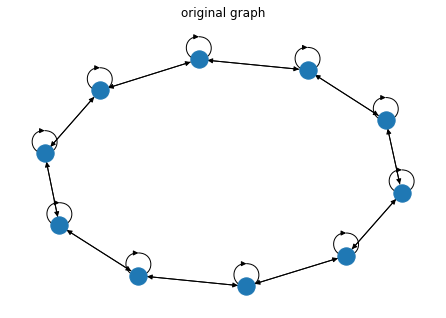

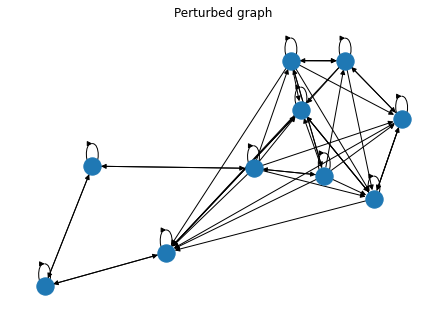

In [132]:
#Load MiniGC Dataset from dgl
#dataset consists of (graph,label) tuples
#and is parameterized by (num_graphs, min_nodes, max_nodes)
#by default class balance. If Ngraphs > Nclasses, a uniform 
#number of graphs are assigned to each class
dataset = MiniGCDataset(120, 10, 20)
x = dataset[1][0]
perturb_and_visualize(x)

In [142]:
dataset[0][0]

Graph(num_nodes=15, num_edges=45,
      ndata_schemes={}
      edata_schemes={})

tensor([0], dtype=torch.int32)
tensor([1], dtype=torch.int32)
saved to images/dataset.png


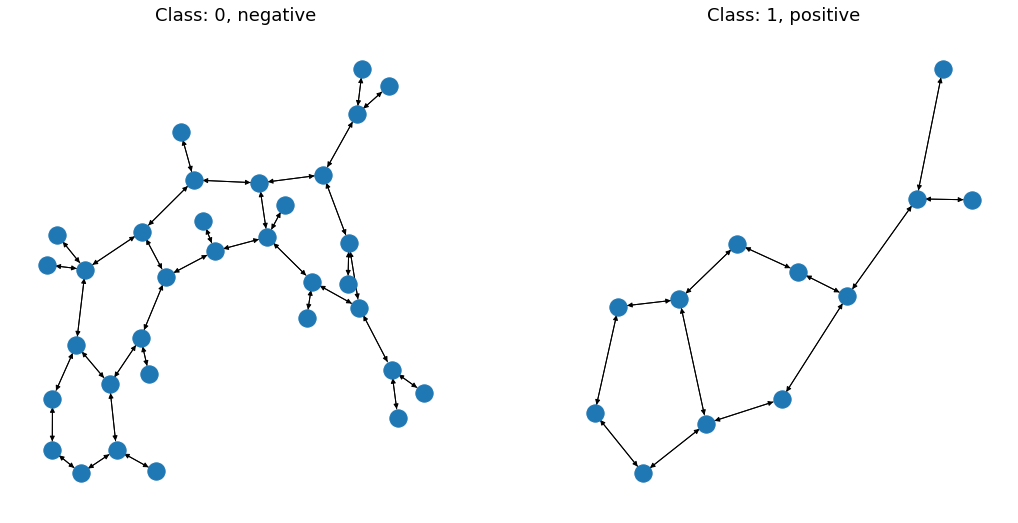

In [ ]:
#plot an individual random graph from each class
#along with its numeric class label, label
#Currently: Only supports MiniGCDataset
from dgl.data import MiniGCDataset, TUDataset
dataset = TUDataset("ptc_fm")
plot_samples('ptc', dataset)

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('logs.txt', header = None)
data.columns = ['policy','run', 'episode', 'baseline', 'perturbed', 'reward']
data = data.groupby(['policy', 'episode']).mean().reset_index()
sns.lineplot(data.episode, data.reward, data.policy)
plt.title('Episodic Reward - Averaged over n runs')
plt.show()





EmptyDataError: No columns to parse from file

C:\ProgramData\Anaconda3\envs\adagrad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\adagrad\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\adagrad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)

Text(0.5, 1.0, 'Episodic Reward Density Comparison')

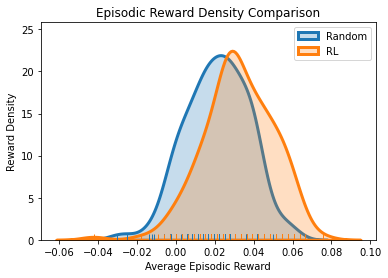

In [6]:

sns.distplot(data[data['policy'] != 'RL']['reward'], hist=False, rug=True, 
             label = 'Random',kde_kws={"lw": 3, "label": "KDE", "shade": True})
sns.distplot(data[data['policy'] == 'RL']['reward'], hist=False, rug=True, label = 'RL',
             kde_kws={"lw": 3, "label": "KDE", "shade": True})
plt.legend()
plt.xlabel('Average Episodic Reward')
plt.ylabel('Reward Density')
plt.title('Episodic Reward Density Comparison')

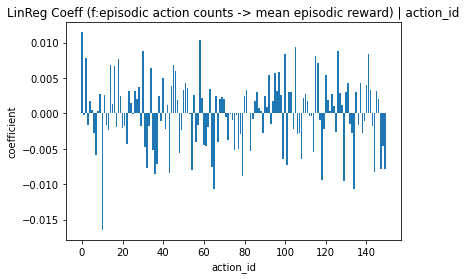

0.8528391802743505


Text(0.5, 0, 'summed coefficients')

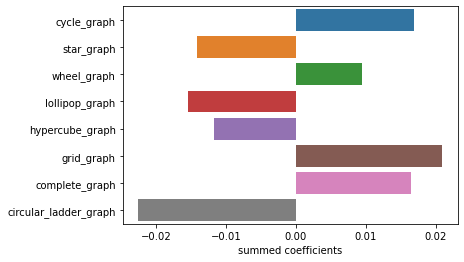

In [8]:
 #run, episode, action
        #run % 2 == 0 is an RL run
        #run % 2 == 1 is a random run
        
with open('action_hist.npy', 'rb') as f:
    a = np.load(f)


from sklearn.linear_model import LinearRegression
rl = np.array([a[i] for i in range(20) if i % 2 == 0])
rand = np.array([a[i] for i in range(20) if i % 2 == 1])


        

data = pd.DataFrame(np.sum(rand, axis = 0)) #action counts per episode summed over run
data = data.reset_index()

y = pd.read_csv('logs.txt', header = None)
y.columns = ['policy','run', 'episode', 'baseline', 'perturbed', 'reward']
y = y[y['policy'] == 'RL']
y = y.groupby('episode').mean()#avg episodic reward over runs
y = y.reset_index()

data['y'] = y['reward']
data = data.iloc[:,1:]
x = np.array(data)[:, :-1]
y = np.array(data)[:, -1]

reg = LinearRegression().fit(x, y)
plt.bar([i for i in range(len(reg.coef_))], reg.coef_)
plt.xlabel('action_id')
plt.ylabel('coefficient')
plt.title('LinReg Coeff (f:episodic action counts -> mean episodic reward) | action_id')
plt.show()
print(reg.score(x, y))
from collections import Counter
test = reg.coef_.argsort()[-7:][::-1]
Counter([np.floor(i / 18.75) for i in test])

e = np.zeros(8)
for i,j in enumerate(reg.coef_):
    class_ = int(np.floor(i / 18.75))
    e[class_] += j

label_names = [
    "cycle_graph",
    "star_graph",
    "wheel_graph",
    "lollipop_graph",
    "hypercube_graph",
    "grid_graph",
    "complete_graph",
    "circular_ladder_graph",
]

sns.barplot(x = e, y = label_names)
plt.xlabel('summed coefficients')